In [2]:
## necessary package
import pandas as pd


In [3]:
pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
## reading the data
file_path = 'wines.txt'
wine = pd.read_csv(file_path, delimiter=',')

In [6]:
print(wine)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.2              0.32         0.47             5.1      0.044   
1               9.7              0.24         0.45             1.2      0.033   
2               7.2              0.27         0.74            12.5      0.037   
3               4.8              0.34         0.00             6.5      0.028   
4               5.0              0.17         0.56             1.5      0.026   
...             ...               ...          ...             ...        ...   
2495           10.1              0.43         0.40             2.6      0.092   
2496           10.0              0.29         0.40             2.9      0.098   
2497           10.6              0.31         0.49             2.2      0.063   
2498            7.0              0.58         0.28             4.8      0.085   
2499            7.5              0.61         0.20             1.7      0.076   

      free sulfur dioxide  

In [7]:
# Check data info
print(wine.info())
## 13 variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         2500 non-null   float64
 1   volatile acidity      2500 non-null   float64
 2   citric acid           2500 non-null   float64
 3   residual sugar        2500 non-null   float64
 4   chlorides             2500 non-null   float64
 5   free sulfur dioxide   2500 non-null   float64
 6   total sulfur dioxide  2500 non-null   float64
 7   density               2500 non-null   float64
 8   pH                    2500 non-null   float64
 9   sulphates             2500 non-null   float64
 10  alcohol               2500 non-null   float64
 11  type                  2500 non-null   object 
 12  great wine            2500 non-null   bool   
dtypes: bool(1), float64(11), object(1)
memory usage: 236.9+ KB
None


# Q1 What is the proportion of great wines in the dataset?

In [8]:
# Proportion of great wines
great_wine_proportion = wine['great wine'].value_counts(normalize=True)
print("Proportion of Great Wines:")
print(great_wine_proportion)

Proportion of Great Wines:
great wine
False    0.8304
True     0.1696
Name: proportion, dtype: float64


NameError: name 'ax' is not defined

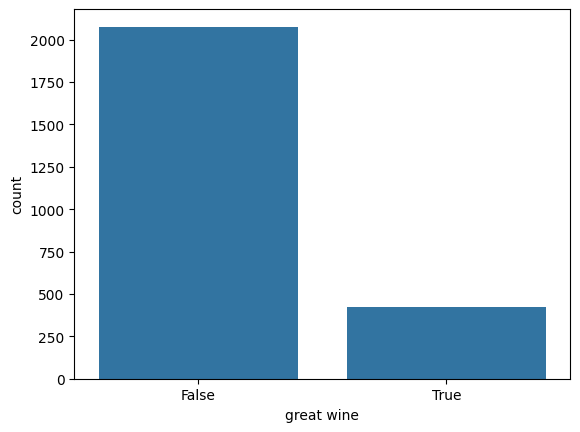

In [9]:
# Plot the proportion of great vs non-great wines
sns.countplot(data=wine, x="great wine")
ax.set(title="Proportion of Great Wines")

# Q2 How are the different variables (acidity, alcohol percentage, pH, etc.) distributed in the dataset?

In [21]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,7.574620,0.407888,0.302384,4.22000,0.066762,25.452200,92.711000,0.995263,3.255064,0.572580,10.501129
std,1.555536,0.193440,0.166705,3.83954,0.043076,17.717002,60.239227,0.002775,0.164223,0.167606,1.150068
min,4.200000,0.100000,0.000000,0.70000,0.009000,1.000000,6.000000,0.987400,2.740000,0.250000,8.000000
25%,6.575000,0.260000,0.210000,1.80000,0.042000,12.000000,37.000000,0.993287,3.140000,0.460000,9.500000
50%,7.200000,0.360000,0.300000,2.40000,0.059000,23.000000,90.000000,0.995625,3.250000,0.550000,10.300000
75%,8.200000,0.540000,0.400000,5.30000,0.080000,35.000000,136.000000,0.997243,3.360000,0.650000,11.300000
max,15.600000,1.580000,1.000000,23.50000,0.611000,289.000000,440.000000,1.003690,4.010000,2.000000,14.000000


In [ ]:
numerical_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                     'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                     'pH', 'sulphates', 'alcohol']

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(wine[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [16]:
each_wine_agg = wine.groupby("type").aggregate(
       alcohol = ("alcohol", "mean"),
       sulphates = ("sulphates", "mean"),
       pH = ("pH", "mean"),
       free_sulfur_dioxide = ("free sulfur dioxide", "mean"),
       volatile_acidity = ("volatile acidity", "mean"),
       residual_sugar = ("residual sugar", "mean"),
       fixed_acidity = ("fixed acidity", "mean"),
       total_sulfur_dioxide = ("total sulfur dioxide", "mean"),
       citric_acid = ("citric acid", "mean"),
       density = ("density", "mean"),
       chlorides = ("chlorides", "mean")  
    ).T

print(each_wine_agg)

type                        Red       White
alcohol               10.424747   10.577512
sulphates              0.657456    0.487704
pH                     3.310656    3.199472
free_sulfur_dioxide   15.821600   35.082800
volatile_acidity       0.530932    0.284844
residual_sugar         2.535840    5.904160
fixed_acidity          8.300640    6.848600
total_sulfur_dioxide  46.505200  138.916800
citric_acid            0.271344    0.333424
density                0.996726    0.993801
chlorides              0.087600    0.045925


ML

In [18]:
each_wine_agg.to_csv('each_wine_agg.csv', header=True, index=True, encoding='utf-8')